<a href="https://colab.research.google.com/github/Mads8760/Ciencia-de-dados/blob/main/Ci%C3%AAncia_de_Dados_Avan%C3%A7ado_Madelu_Lopes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Você trabalha como cientista de dados em uma empresa de meteorologia que coleta dados diários de temperatura ao longo dos anos. O objetivo da empresa é prever a temperatura de amanhã com base nas temperaturas anteriores, para fornecer uma previsão mais precisa. Para isso, você decide usar uma rede neural do tipo LSTM (Long Short-Term Memory), que é adequada para lidar com dados sequenciais.

Seu objetivo nesta oficina é construir um modelo de deep learning utilizando uma rede neural LSTM que possa prever a temperatura do dia seguinte com base nas temperaturas dos últimos 30 dias.

###Passo 1: Preparação do Ambiente
Carregue as bibliotecas necessárias: Para começar, você vai usar bibliotecas como TensorFlow ou Keras, além do Pandas para manipulação de dados e Matplotlib para visualização.

In [ ]:
# Importando as bibliotecas necessárias

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import LSTM, Dense

from sklearn.preprocessing import MinMaxScaler


###Passo 2: Carregamento e Preparação dos Dados
Para simplificar, você pode usar um conjunto de dados fictício ou dados históricos reais de temperaturas médias diárias. Vamos criar um conjunto de dados fictício de temperaturas para os últimos 100 dias.

   Temperatura
0    26.764052
1    27.406646
2    29.910104
3    32.937234
4    34.097184


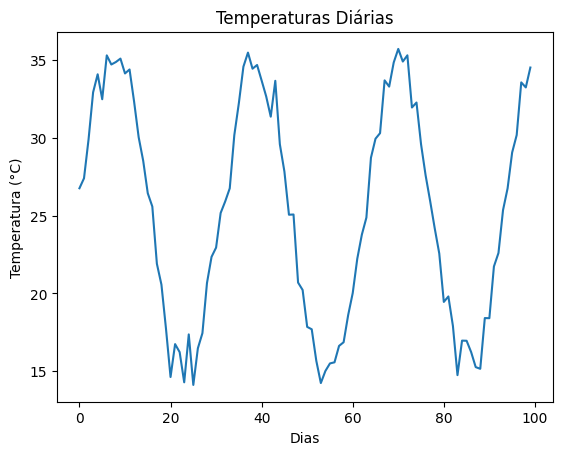

In [ ]:
# Gerando dados fictícios de temperaturas diárias para os últimos 100 dias

# A temperatura segue uma onda senoidal com um pouco de ruído para simular variação real

np.random.seed(0)

data = np.sin(np.linspace(0, 20, 100)) * 10 + 25 + np.random.normal(0, 1, 100)



# Transformando os dados em um DataFrame para facilitar a manipulação

df = pd.DataFrame(data, columns=["Temperatura"])



# Exibindo as primeiras 5 linhas do DataFrame para visualizar os dados

print(df.head())



# Visualizando os dados de temperatura para ter uma ideia das tendências

plt.plot(df)

plt.title("Temperaturas Diárias")

plt.xlabel("Dias")

plt.ylabel("Temperatura (°C)")

plt.show()

### Passo 3: Pré-processamento dos Dados
Agora, vamos preparar os dados para que possam ser usados em uma rede LSTM. Como LSTMs trabalham com sequências, vamos transformar nossos dados em janelas deslizantes, onde cada janela contém as temperaturas dos últimos 30 dias, e a rede deverá prever o 31º dia.

In [ ]:
# Normalizando os dados para o intervalo [0, 1] utilizando o min-max
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# Função para criar janelas deslizantes
def criar_janelas(data, tamanho_janela):
    X = []
    y = []
    for i in range(len(data) - tamanho_janela):
        X.append(data[i:i+tamanho_janela])
        y.append(data[i+tamanho_janela])
    return np.array(X), np.array(y)

# Criando janelas deslizantes com 30 dias de entrada e previsão do 31º dia
tamanho_janela = 30
X, y = criar_janelas(scaled_data, tamanho_janela)

# Verificando as formas dos conjuntos de entrada e saída
print(f"Desenho de X: {X.shape}")
print(f"Desenho de y: {y.shape}")


Desenho de X: (70, 30, 1)
Desenho de y: (70, 1)


### Passo 4: Construção da Rede LSTM
Agora você vai criar uma rede LSTM simples com uma camada LSTM e uma camada densa para prever a temperatura.

In [ ]:
# Criar o modelo
modeloLSTM = Sequential([
    LSTM(128, return_sequences=False),
    Dense(1, activation="sigmoid")
])

# Compilar o modelo
modeloLSTM.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])





### Passo 5: Avaliação e Previsão
Agora que o modelo está treinado, vamos avaliar o desempenho e fazer previsões nos dados de teste.



2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Mean Squared Error: 50.93350082762856
Mean Absolute Error: 6.426984846938256


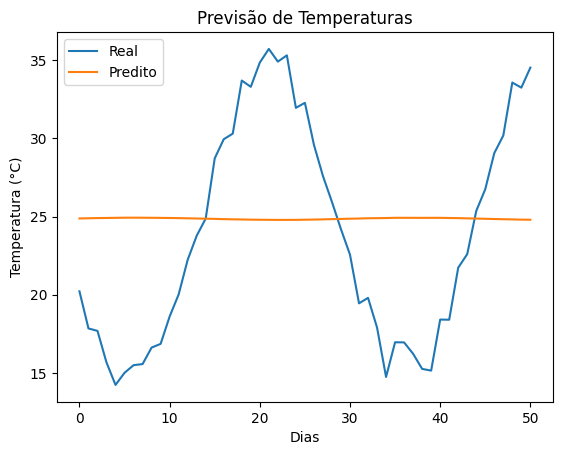

In [ ]:
# Vamos dividir os dados entre treinamento e teste (exemplo: 30% treinamento e 70% teste)
train_size = int(len(scaled_data) * 0.3)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size], scaled_data[train_size:len(scaled_data)]

tamanho_janela = min(tamanho_janela, len(test_data) - 1)

# Criando janelas deslizantes para os dados de teste
X_test, y_test = criar_janelas(test_data, tamanho_janela)

# Fazendo previsões no conjunto de teste
y_pred = modeloLSTM.predict(X_test)

# Revertendo a normalização para obter valores reais
y_test_inverse = scaler.inverse_transform(y_test)
y_pred_inverse = scaler.inverse_transform(y_pred)

# Avaliando o desempenho do modelo
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test_inverse, y_pred_inverse)
mae = mean_absolute_error(y_test_inverse, y_pred_inverse)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

# Plotando os resultados
plt.plot(y_test_inverse, label='Real')
plt.plot(y_pred_inverse, label='Predito')
plt.title('Previsão de Temperaturas')
plt.xlabel('Dias')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()
